In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd

In [50]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import func

In [52]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
inspector = inspect(engine)
# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [54]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [57]:
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [58]:
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

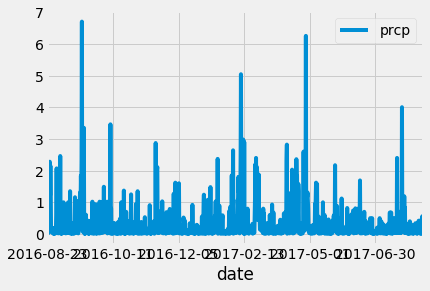

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query_string = session.query(measurement.date,measurement.prcp).filter(measurement.date>='2016-08-23').filter(measurement.prcp>0).order_by(measurement.date).all()

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
year_ago = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_pd = pd.DataFrame(query_string)
precipitation_pd = precipitation_pd.set_index('date')

# Sort the dataframe by date
precipitation_pd.head()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_pd.plot()


In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_pd.describe()

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [61]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(measurement).count()
print(stations)

19550


In [62]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.id, measurement.station, measurement.tobs).all()
active_stations_pd = pd.DataFrame(active_stations)
active_stations_pd.head()

,id,station,tobs
0,1,USC00519397,65.0
1,2,USC00519397,63.0
2,3,USC00519397,74.0
3,4,USC00519397,76.0
4,5,USC00519397,73.0


In [71]:
number_stations_pd=pd.DataFrame(active_stations_pd['station'].value_counts())
number_stations_pd = number_stations_pd.reset_index()
number_stations_pd = number_stations_pd.rename(columns={'station':'number_stations'})
number_stations_pd = number_stations_pd.rename(columns={'index':'station'})
number_stations_pd

,station,number_stations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [94]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
promedios= session.query(func.avg(measurement.tobs).label('lowest')).filter(measurement.station=='USC00519281')
for promedio in promedios:
    print(f'El promedio es:{promedio}')

El promedio es:(71.66378066378067,)


In [96]:
temp_min = session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281')
for menor in temp_min:
    print(f'La temperatura minima es: {menor}')

La temperatura minima es: (54.0,)


In [99]:
temp_max = session.query(measurement.id, measurement.tobs).filter(measurement.station=='USC00519281').order_by(measurement.tobs.desc()).first()
print(temp_max)

(14261, 85.0)


In [102]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_date=session.query(measurement.date).filter(measurement.id==14261).order_by(measurement.date.desc()).first()
temp_date

('2015-09-10')

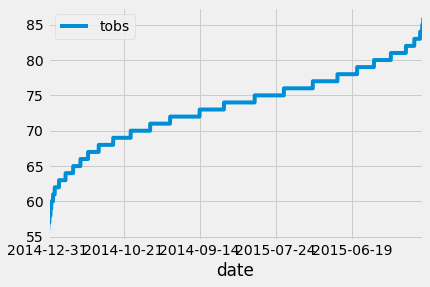

In [107]:
observations = session.query(measurement.date,measurement.tobs).filter(measurement.date>='2014-09-10').filter(measurement.date<='2015-09-10').order_by(measurement.tobs).all()
observation_df = pd.DataFrame(observations)
observation_df = observation_df.set_index('date')
observation_df.plot()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
